#### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer

#### Load the dataset

In [ ]:
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.value_counts()

0    357
1    212
Name: count, dtype: int64

In [ ]:
def fnr(y_true, y_pred):

  tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
  FNR = fn / (tp + fn)

  return FNR

In [ ]:
fnr_score = make_scorer(
    fnr,
    greater_is_better=False,
    needs_proba=False,
)

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators = 100, max_depth=1, random_state=42, n_jobs=4
)

rf_param_grid = dict(
    n_estimators=[10, 20, 50, 100, 200, 500, 1000, 2000],
    max_depth=[1, 2, 3, 4]
)

clf = GridSearchCV(rf_model,
                   rf_param_grid,
                   scoring=fnr_score,
                   cv=5)

search = clf.fit(X, y)

search.best_params_

{'max_depth': 4, 'n_estimators': 50}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
results.head()

,params,mean_test_score,std_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",-0.159579,0.073038
1,"{'max_depth': 1, 'n_estimators': 20}",-0.154817,0.074869
2,"{'max_depth': 1, 'n_estimators': 50}",-0.178738,0.053176
3,"{'max_depth': 1, 'n_estimators': 100}",-0.154707,0.096391
4,"{'max_depth': 1, 'n_estimators': 200}",-0.145293,0.094098


Text(0.5, 0, 'Hyperparameter space')

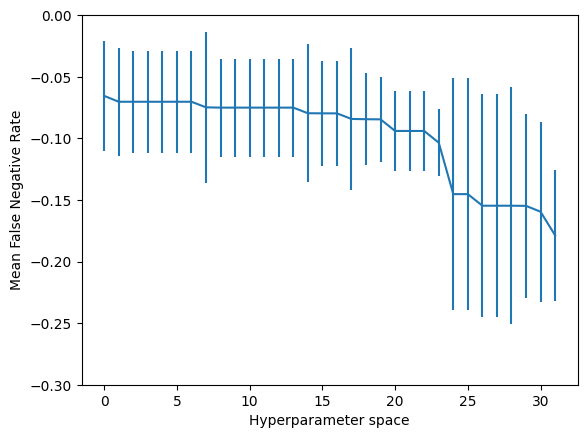

In [ ]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylim(-0.3, 0)
plt.ylabel('Mean False Negative Rate')
plt.xlabel('Hyperparameter space')

In [ ]:
def fnr(y_true, y_pred):

  y_pred_class = np.where(y_pred > 0.37, 1, 0)
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred_class, labels=[0,1]).ravel()
  FNR = fn / (tp + fn)

  return FNR

In [ ]:
fnr_score = make_scorer(fnr,
                        greater_is_better=False,
                        needs_proba=True)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=0, n_jobs=4)

rf_param_grid = dict(n_estimators=[10, 20, 50, 100, 200, 500, 1000, 2000],
                     max_depth=[1, 2, 3, 4],)

clf = GridSearchCV(rf_model,
                   rf_param_grid,
                   scoring=fnr_score,
                   cv=5)

search = clf.fit(X, y)

search.best_params_

{'max_depth': 4, 'n_estimators': 500}

Text(0.5, 0, 'Hyperparameter space')

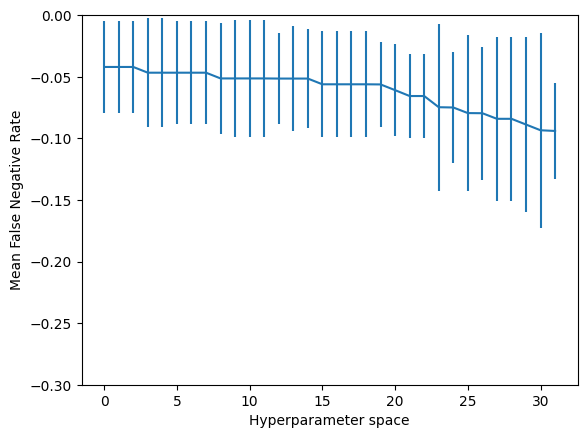

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylim(-0.3, 0)
plt.ylabel('Mean False Negative Rate')
plt.xlabel('Hyperparameter space')